<h1 align="center">Volume 4: Spectral 2.</h1>

    Spencer Halverson
    Section #
    2022-01-20

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

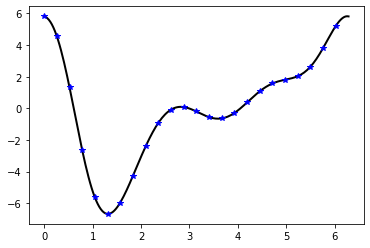

In [3]:
N=24
x1 = (2*np.pi / N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

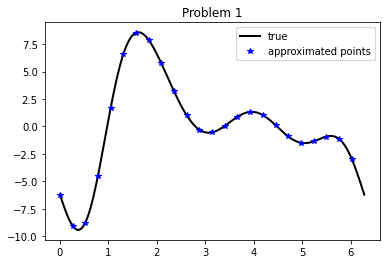

In [7]:
N=24
x1 = (2*np.pi / N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Since fp is the value of the derivative at the Fourier points, 
#  we can apply the process again to get 2nd derivative
f_hat2 = fft(fp)
fp_hat2 = ((1j*k)*f_hat2)
fp2 = np.real(ifft(fp_hat2))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

d2 = (2.*np.cos(x2)**3 
      - 2*np.exp(2*np.sin(x2+1))*(np.sin(x2+1)-2*np.cos(x2+1)**2) 
      - 7*np.sin(x2)**2 * np.cos(x2)
      )
formula = 0.5*d2 - derivative # (1/2)u" - u'

plt.plot(x2,formula,'-k',linewidth=2., label="true")
# plot approximation
plt.plot(x1,0.5*fp2 - fp,'*b', label="approximated points")
plt.legend(loc='best')
plt.title("Problem 1")
plt.show()

# Problem 2 - setup

In [19]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


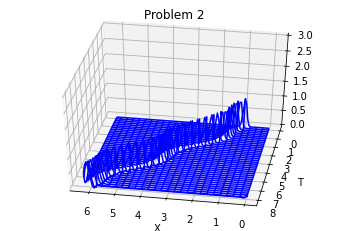

In [76]:
t_steps = 150 # Time steps
x_steps = 100 # x steps

a = 0
b = 8
t, h = np.linspace(a,b,t_steps,retstep=True)
y0 = np.exp(-100*(np.linspace(0, 2*np.pi,x_steps) - 1)**2) # array of u_values

X, Y, h, n = initialize_all(a,b,y0,h)

def f(x,y):
    N = x_steps
    c = 0.2 + np.sin(x - 1)**2 # array of c_values

    k = np.concatenate(( np.arange(0,N/2) ,
        np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
        np.arange(-N/2+1,0) ))

    # Approximates the derivative using the pseudospectral method
    f_hat = fft(y)
    fp_hat = ((1j*k)*f_hat)
    fp = np.real(ifft(fp_hat))

    return -1*c*fp

# RK4 method. Should return a t_steps by x_steps array
sol = RK4(f,X, Y, h,n)

x_domain = np.linspace(0, 2*np.pi, x_steps)
t_domain = np.linspace(a, b, t_steps)
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol, cstride=4, rstride=4, color='blue')
ax.set_zlim(0,3)
ax.view_init(40, 100)
plt.xlabel("X")
plt.ylabel("T")
plt.title("Problem 2")
plt.show()
